In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Problem 3: Compare Gradient Descent method and Newton Methods

In [2]:
Sigma = np.array([
    [5,  0],
    [0, .5]
])

In [7]:
v = np.array([
    [1],
    [3]
])

In [21]:
def F(x: np.ndarray) -> float:
    return np.matmul(np.matmul(x.T, Sigma), x) + math.log(1 + math.exp(-np.matmul(np.ones(x.shape).T, x)))

In [23]:
def F1(x: np.ndarray):  # first derivative
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-(x1+x2))
    return np.array([
        [10 * x1 - ex / ( 1 + ex )],
        [ x2 - ex / ( 1 + ex ) ]
    ])

def F2(x: np.ndarray):  # second derivative
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-(x1+x2))
    ex = ex/(1+ex)**2
    return np.array([
        [10+ex, ex],
        [ex,  1+ex]
    ])

Newton Method with $\eta = 1$ (NM1)

In [76]:
eta = 1

x_nm1 = np.zeros((30, 2, 1))

for t in range(29):
    x_nm1[t+1] = x_nm1[t] - eta * np.matmul(np.linalg.inv(F2(x_nm1[t])), F1(x_nm1[t]))

Gradient Descent Method with constant step size $\eta = 0.10$ (GD0.1)

In [77]:
eta = 0.1

x_gd010 = np.zeros((30, 2, 1))

for t in range(29):
    x_gd010[t+1] = x_gd010[t] - eta * F1(x_gd010[t])

Gradient Descent Method with constant step size $\eta = 0.19$ (GD0.19)

In [78]:
eta = 0.19

x_gd019 = np.zeros((30, 2, 1))

for t in range(29):
    x_gd019[t+1] = x_gd019[t] - eta * F1(x_gd019[t])

Gradient Descent Method with constant step size $\eta = 0.20$ (GD0.2)

In [79]:
eta = 0.2

x_gd020 = np.zeros((30, 2, 1))

for t in range(29):
    x_gd020[t+1] = x_gd020[t] - eta * F1(x_gd020[t])

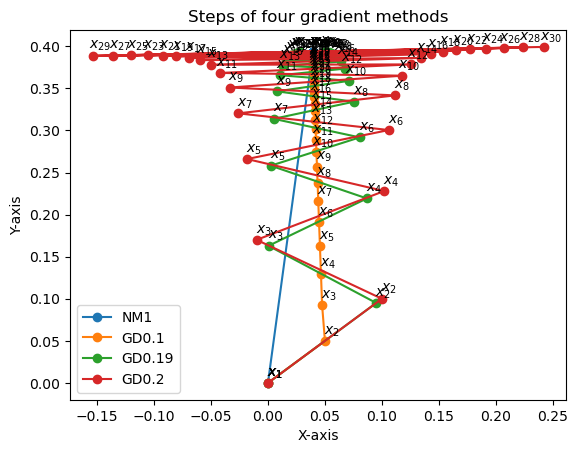

In [88]:
times = [f"$x_{{{t}}}$" for t in range(1, 31)]
# Plot the data
plt.plot(x_nm1[:,0,:], x_nm1[:,1,:], marker='o', label="NM1")
plt.plot(x_gd010[:,0,:], x_gd010[:,1,:], marker='o', label="GD0.1")
plt.plot(x_gd019[:,0,:], x_gd019[:,1,:], marker='o', label="GD0.19")
plt.plot(x_gd020[:,0,:], x_gd020[:,1,:], marker='o', label="GD0.2")

# Annotate each point with the corresponding time
for i, time in enumerate(times):
    plt.annotate(time, (x_nm1[:,0,:][i]  , x_nm1[:,1,:][i]  ), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd010[:,0,:][i], x_gd010[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd019[:,0,:][i], x_gd019[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd020[:,0,:][i], x_gd020[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')

# Show the plot
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Steps of four gradient methods")
plt.legend()
plt.show()

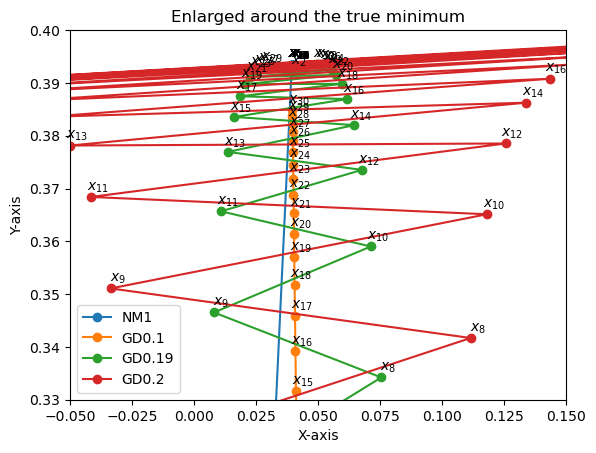

In [89]:
times = [f"$x_{{{t}}}$" for t in range(1, 31)]
# Plot the data
plt.plot(x_nm1[:,0,:], x_nm1[:,1,:], marker='o', label="NM1")
plt.plot(x_gd010[:,0,:], x_gd010[:,1,:], marker='o', label="GD0.1")
plt.plot(x_gd019[:,0,:], x_gd019[:,1,:], marker='o', label="GD0.19")
plt.plot(x_gd020[:,0,:], x_gd020[:,1,:], marker='o', label="GD0.2")

# Annotate each point with the corresponding time
for i, time in enumerate(times):
    plt.annotate(time, (x_nm1[:,0,:][i]  , x_nm1[:,1,:][i]  ), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd010[:,0,:][i], x_gd010[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd019[:,0,:][i], x_gd019[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd020[:,0,:][i], x_gd020[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')

# Show the plot
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.xlim(-0.05, 0.15)
plt.ylim(0.33, 0.40)
plt.title("Enlarged around the true minimum")
plt.legend()
plt.show()

We have the following observations:

* NM1 takes only 1 step to reach the minimum and it stays there.
* GD0.1 descends towards the minimum but slowly. It is still away from the minimum after 30 steps.
* GD0.19 zigzags but generally descends towards the minimum. It reaches the proximity of the minimum within 30 steps.
* GD0.20 zigzags and deviates away from the minimum. This is the case when the step size is too big. (i.e., when $\eta > \frac{2}{\beta}$)

# Problem 5: Regular SGD vs AdaGrad Optimization on a Regression Problem

In [ ]:
import numpy as np
import random
import time

# initialization
sigma = 1
d = 10
c_square = 100
cov = np.diag([(0.25**i) * c_square for i in range(1,d+1)])
mean = [0] * d

# coefficient given
w = np.array([1]*d)

# Sampler function
def sampler(n):
    # data X generator
    np.random.seed(int(time.time() * 100000) % 100000)
    X = np.random.multivariate_normal(mean, cov, n)
    # data Y generator
    Y = np.matmul(X, w) + np.random.normal(0, sigma**2, n)
    return (X, Y)